# Getting Familiar with Pandas pt 5

## Logistic Regression Modeling

### Charity Miller

Importing the following libraries will allow us to get hands on practice with classification predictions through machine learning.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Exploring the Datasets

In [31]:
train = pd.read_csv(r'C:\Users\16824\Python Coding Files\Data\train (2).csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Column Dictionary**:
1. PassengerID-type should be integers
2. Survived-survived or not
3. Pclass-class of Travel of every passenger
4. Name- the name of the passenger
5. Sex -gender
6. Age-age of passengers
7. SibSp -No. of siblings/spouse aboard
8. Parch-No. of parent/child aboard
9. Ticket-Ticket number
10. Fare -what Prices they paid
11. Cabin -cabin number
12. Embarked-the port in which a passenger has embarked.
    - C -Cherbourg , S -Southhampton , Q -Queenstown

In [32]:
#Count the number of people aboard the Titanic
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

Gathering information on the Titanic with .info and.describe

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exploratory Data Analysis

We will create a graph to help visualize haw many null values are missing from the Titanic dataset.

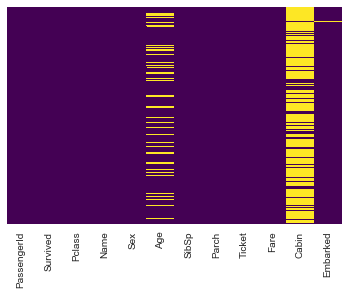

In [35]:
#Create a heatmap with seaborn to view missing data
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap= 'viridis')

The yellow marks on the graph signify how many null values are in an attribute. Here we can see that Age and Cabin have the most null values, but Cabin is missing information for the mass majority of data. 

## Data Visualization

Here we will visualize the Titanic passengers by sex and survival with a bar chart signifying peach for females, blue for males, 0 for died, and 1 for survived. 

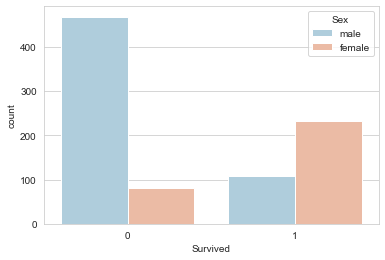

In [36]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')

Looking at this chart we can see that many males didn't survive the Titanic. 

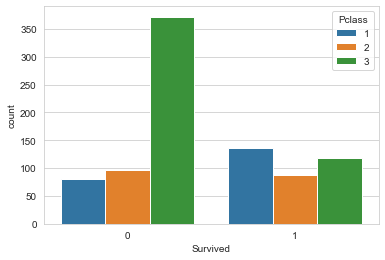

In [37]:
#Survivors according to passenger class
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train)

Using .countplot, we were able to generate a bar graph to count the passengers graph them according to surval and passenger class.

From this graph it is clear to see that the 3rd class passengers had the lowest amount of survivors.

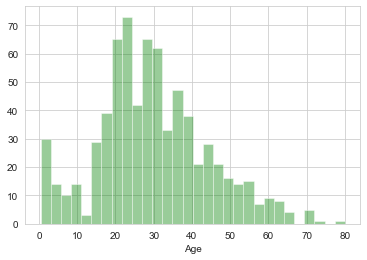

In [38]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30, color='Green')

Graphing the data by age allows us to view which age groups had better chances of survival. From the data above we can see that passengers from age 20 - 30 had higher chances of survival.

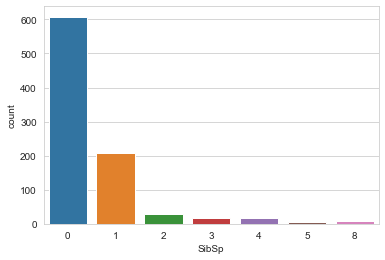

In [39]:
sns.countplot(x='SibSp',data=train)

Here we can see if passengers had family on board or not.

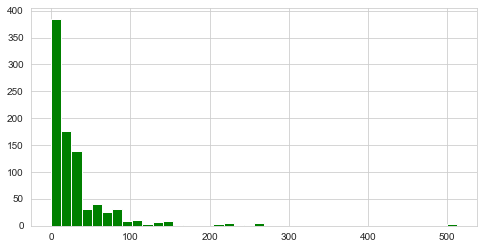

In [40]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

We created a histogram to show the ticket purchase prices paid to board the Titanic.

## Data Cleaning

The article will show us how to fill in missing data (null values) with the mean (average) of the data.

We created a boxplot with age on y-axis and passenger class on the x-axis to show the age fo the majority of passengers within the seperate classes.

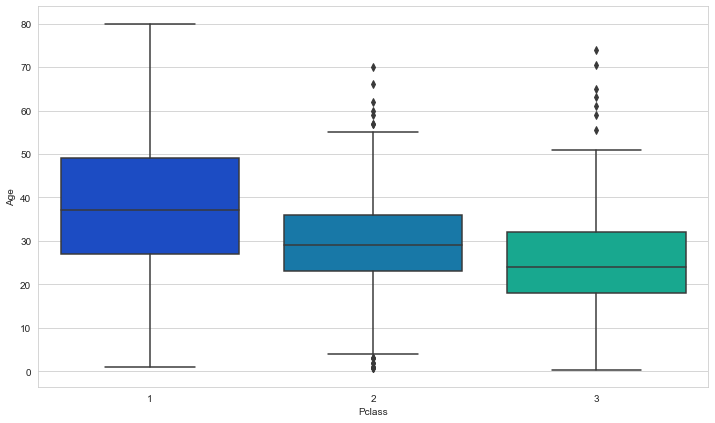

In [41]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

Here we are using the average age values replace the current null values.

In [42]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
                    return 37
        elif Pclass == 2:
                    return 29
        else:
                    return 24
    else:
            return Age

train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

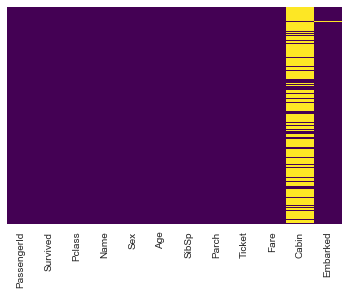

In [43]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Here we are able to see that all of the null values for age category have been filled in and only the Cabin and Embarked columns have null values.  

In [44]:
#Here we will drop the columns with null values (Cabin) and the row with null values under the Embarked column
train.drop('Cabin',axis=1,inplace=True)
train.dropna(inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Converting Categorical Features

Using the get_dummies function we will turn the categories into dummy variable for our model.

In [45]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

#drop the sex,embarked,name and tickets columns
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

#concatenate new sex and embark column to our train dataframe

train = pd.concat([train,sex,embark],axis=1)

#check the head of dataframe
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Building a Logistic Regression model

The article will teach us how to split our data into a training and test set by conducting a Train Test Split.

Our objective is to predict if a passenger survived the Titanic.

### Train Test Split

In [46]:
from sklearn.model_selection import train_test_split

#X represents features
#Y represents the data we are looking to predict

X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
           train['Survived'], test_size=0.30, 
            random_state=101)

### Training the Model with Logistic Regression

We imported the Logistic Regression module to place it in our training model

In [50]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\16824\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
#The code below will be used for our predictions in the X_test dataset
predictions = logmodel.predict(X_test)

## Model Evaluation

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



Here we checked the accuracy of the model which resulted in 82%

In [64]:
import sklearn.metrics
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predictions))

[[151  12]
 [ 36  68]]


Here we can see the confusion matrix which will allow us to view our true negative and positive and false negative and positive. 

- Predicted 186 would not survive, 36 survived and 151 did not survive
    - True Negative: 151 
    - False negative: 36
- Predicted 80 would survive, 68 survived and 12 did not survive
    - False positive: 12
    - True positive: 68